In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the CSV file into a Pandas DataFrame
rate_df = pd.read_csv("Resources/global_carry_trades.csv")

# Review the DataFrame
rate_df.head()

,interest_differential,next_month_currency_return,IMF Country Code
0,0.001414,-0.061174,GBR
1,-0.000570,-0.058120,BEL
2,0.001478,-0.056031,DNK
3,0.000655,-0.056991,FRA
4,-0.002928,-0.067056,DEU


## Prepare the Data 

In [3]:
# Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values


# Diplay the first three rows of the scaled data


array([[-0.24270991, -1.93608838],
       [-0.8539933 , -1.84109498],
       [-0.22308154, -1.77613322],
       [-0.47661717, -1.80599379],
       [-1.58045852, -2.11907333]])

In [4]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step


,interest_differential,next_month_currency_return
0,-0.242710,-1.936088
1,-0.853993,-1.841095
2,-0.223082,-1.776133
3,-0.476617,-1.805994
4,-1.580459,-2.119073
...,...,...
994,0.122649,-0.846237
995,-0.038476,-0.722418
996,-2.065714,-0.113693
997,-0.283230,-1.169689


In [5]:
# Encode (convert to dummy variables) the "IMF Country Code" column


# Review the DataFrame


,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# Concatenate the scaled data DataFrame with the "IMF Country Code" encoded dummies 


# Display the combined DataFrame.


,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Fit and Predict with KMeans

In [7]:
# Initialize the K-Means model with n_clusters=3


# Fit the model for the rate_df_scaled DataFrame


# Save the predicted model clusters to a new DataFrame.


# View the country clusters


[1 1 1 1 1 1 1 0 1 1 0 1 1 0 2 0 2 2 2 2 0 2 0 0 2 0 2 0 0 2 0 2 0 2 2 0 2
 0 0 2 0 2 0 0 2 2 2 1 2 2 1 2 0 0 2 2 2 0 0 2 2 1 2 2 2 1 2 0 2 2 0 2 0 0
 2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 2 2 2 2 2 2 2 1 2 2 2 2 0 0 2 1 2 2 2 2 1
 2 1 2 2 1 2 0 1 2 0 2 2 2 2 0 2 0 0 2 0 2 1 0 2 0 2 2 2 2 0 2 0 0 2 2 2 0
 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 0 2 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 2 2 0 1 2 0 0 2 2 0 2 2 0 0 2 2 2 1 0 2 1 2 1 1 2 1 2 1 1 1 2 2
 0 0 2 0 2 2 2 2 0 2 2 2 2 0 2 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 0 2 2 2
 2 0 2 2 0 2 0 2 0 1 2 0 2 2 2 2 0 2 0 0 2 0 2 0 0 2 1 1 1 1 1 1 1 1 1 1 0
 1 0 0 2 0 2 2 2 2 0 2 0 0 2 0 2 0 0 2 0 2 0 2 2 0 2 0 0 2 0 2 0 0 2 0 0 0
 0 2 0 2 0 0 2 0 2 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 2 0 0 0 2 0 2 0 0 2 1 2
 0 0 2 0 0 2 2 0 2 0 0 2 0 2 0 1 2 1 0 2 2 0 2 0 0 2 0 1 0 0 2 0 0 2 2 0 2
 0 0 2 0 2 0 0 2 0 2 1 2 1 2 0 0 2 0 2 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 2 0
 0 0 2 0 2 0 0 0 0 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 0 0 2 0
 2 0 0 2 0 0 0 2 0 2 0 0 

In [8]:
# Create a copy of the concatenated DataFrame


# Create a new column in the copy of the concatenated DataFrame with the predicted clusters


# Review the DataFrame


,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE,CountryCluster
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## Plot and Analyze the Results

In [9]:
# Group the saved DataFrame by cluster using `groupby` to calculate average currency returns



CountryCluster
0    0.521001
1   -1.371088
2    0.144451
Name: next_month_currency_return, dtype: float64

<Axes: xlabel='interest_differential', ylabel='next_month_currency_return'>

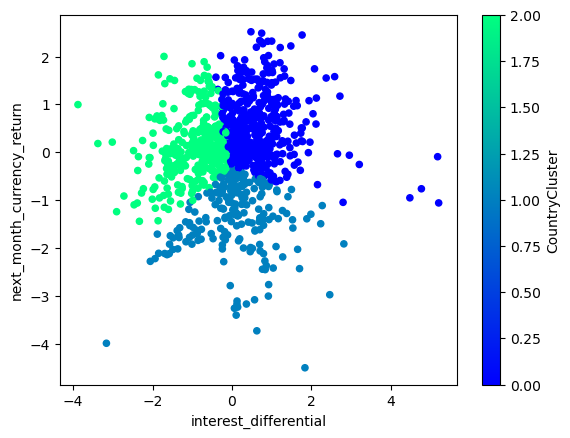

In [10]:
# Create a scatter plot of the interest differential and next months currency return.


* Based on this plot, which cluster of country appears to provide both the highest interest spread and currency return?

## Fit and Predict with the Birch Clustering Algorithm

In [11]:
# Initialize a Birch model with n_clusters=5


# Fit the model for the rate_df_scaled DataFrame


# Predict the model segments (clusters)


# View the stock segments


[3 4 3 4 4 4 4 3 4 4 3 4 3 2 1 3 1 3 1 1 2 1 3 2 4 3 1 3 2 1 2 1 3 1 1 2 1
 3 2 1 3 1 3 2 1 3 1 3 1 1 2 1 3 2 4 3 1 3 2 1 3 1 1 4 4 4 4 3 4 4 3 1 2 2
 1 3 4 3 4 4 4 4 3 4 4 3 4 3 0 1 3 1 1 4 4 4 4 3 4 4 3 1 3 2 1 3 1 1 1 1 2
 1 3 4 4 3 4 3 0 1 3 1 1 1 1 2 1 3 2 1 3 1 3 3 1 2 1 1 1 1 2 1 3 2 1 3 1 2
 3 1 2 1 1 1 1 2 1 3 2 1 3 1 2 1 1 3 1 1 4 4 4 4 3 4 4 3 4 3 3 1 3 4 3 4 4
 4 4 3 4 4 3 4 2 3 1 3 1 3 1 2 2 1 3 2 3 3 1 0 2 1 3 1 1 4 4 4 4 3 4 4 3 4
 3 3 1 3 1 1 1 1 2 1 3 2 1 3 1 3 3 1 3 4 3 4 4 4 4 3 4 4 3 4 0 3 1 3 1 1 1
 1 2 1 3 2 3 3 1 2 3 1 2 1 1 2 1 2 1 3 2 3 3 1 2 3 1 3 4 3 4 4 4 4 3 4 4 3
 4 2 3 1 2 1 1 1 1 2 1 3 2 3 3 1 2 3 1 3 1 1 1 1 2 1 3 2 3 3 4 2 3 1 3 1 1
 2 1 2 1 3 2 3 3 1 2 3 1 2 1 2 1 2 1 3 2 3 3 1 2 3 1 2 3 1 1 2 1 3 2 1 3 1
 3 1 1 3 3 1 1 2 1 3 2 3 3 1 3 3 1 3 3 1 1 2 1 3 2 3 3 4 3 3 1 3 3 1 1 2 1
 3 2 3 3 1 3 3 1 2 3 1 1 2 1 3 2 3 3 1 3 3 1 2 3 1 1 2 1 3 2 3 3 1 3 3 1 2
 1 2 1 2 1 3 2 2 3 1 2 3 1 2 1 1 1 1 1 1 4 1 1 1 2 1 1 3 3 1 1 4 1 3 2 3 3
 1 3 3 1 2 1 2 1 2 1 3 2 

In [12]:
# Create a copy of the concatenated DataFrame


# Create a new column in the copy of the concatenated DataFrame with the predicted clusters


# Review the DataFrame


,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE,CountryCluster
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4


<Axes: xlabel='interest_differential', ylabel='next_month_currency_return'>

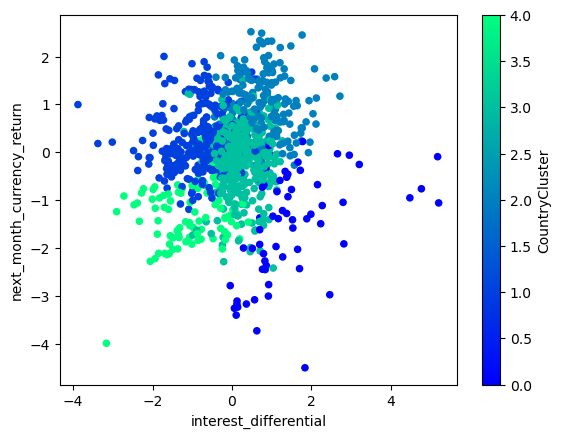

In [13]:
# Create a scatter plot of the interest differential and next months currency return.


* Based on this plot, which cluster of country appears to provide both the highest interest spread and currency return?